In [1]:
#loading dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading dataset to pandas dataframe
gender = pd.read_csv(r"C:\Users\User\Downloads\Gender Classification\gender_classification_v7.csv")

In [3]:
#print the first 5 rows of dataset
gender.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
gender.tail()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female
5000,1,15.4,5.4,1,1,1,1,Male


In [5]:
#total rows and columns in dataset
gender.shape

(5001, 8)

In [6]:
#getting the statistical information
gender.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [7]:
#finding the dtypes in dataset
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [8]:
#finding the null value in dataset
gender.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

# Data Visualization

<AxesSubplot:xlabel='gender', ylabel='count'>

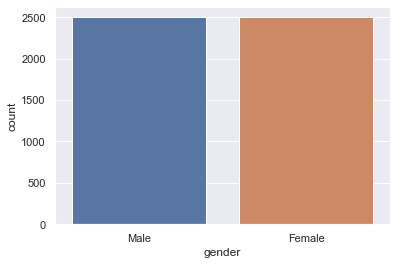

In [9]:
sns.set_theme()
sns.countplot(data=gender,x='gender')

<AxesSubplot:xlabel='nose_wide', ylabel='nose_long'>

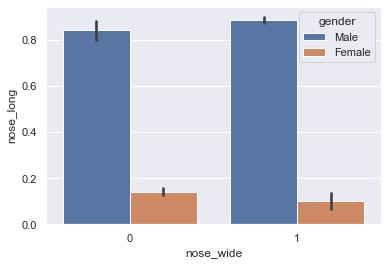

In [10]:
sns.barplot(data=gender,x='nose_wide',y='nose_long',hue='gender')

<AxesSubplot:xlabel='forehead_width_cm', ylabel='forehead_height_cm'>

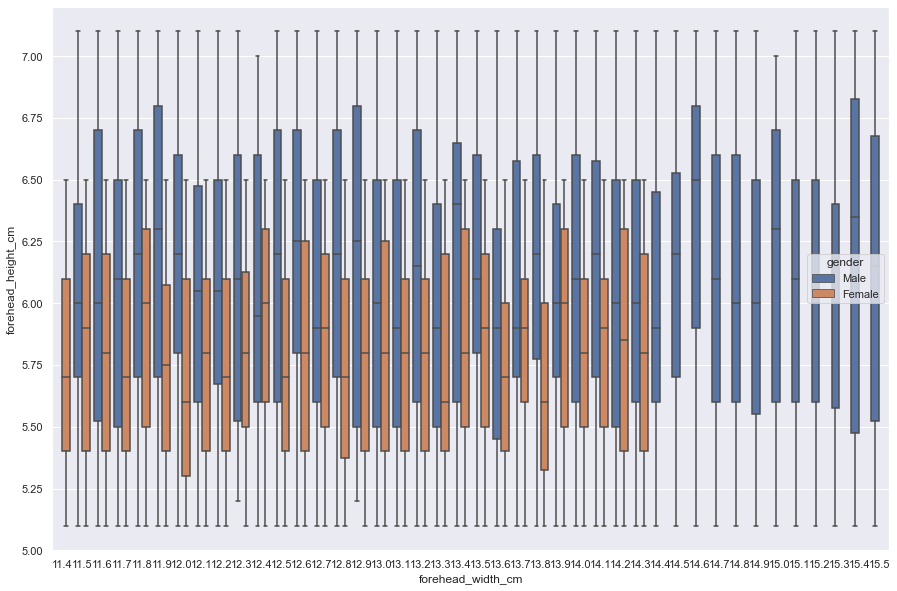

In [11]:
plt.figure(figsize=(15,10))
sns.boxplot(data=gender,x='forehead_width_cm',y='forehead_height_cm',hue='gender')

<AxesSubplot:xlabel='gender', ylabel='count'>

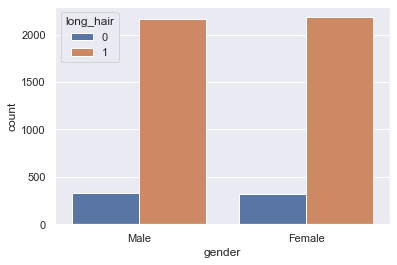

In [12]:
sns.countplot(data=gender,x='gender',hue='long_hair')

In [13]:
corr = gender.corr()

<AxesSubplot:>

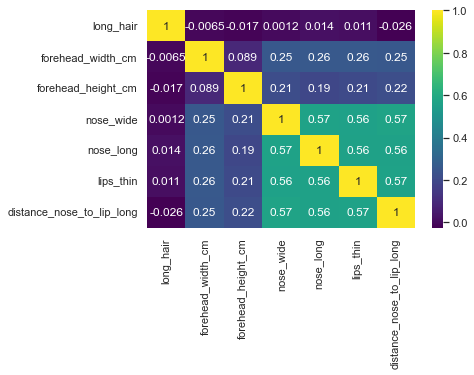

In [14]:
sns.heatmap(corr,annot=True,cmap='viridis')

### Label Encoder

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()

In [17]:
label = le.fit_transform(gender.gender)

In [18]:
gender['target']=label

In [19]:
gender.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,target
0,1,11.8,6.1,1,0,1,1,Male,1
1,0,14.0,5.4,0,0,1,0,Female,0
2,0,11.8,6.3,1,1,1,1,Male,1
3,0,14.4,6.1,0,1,1,1,Male,1
4,1,13.5,5.9,0,0,0,0,Female,0


## Splitting data into train test and split

In [20]:
X = gender.drop(columns=['gender','target'],axis=1)
Y = gender['target']

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [22]:
print(X.shape,X_train.shape,X_test.shape)

(5001, 7) (4000, 7) (1001, 7)


### Data Standarization

In [23]:
print(gender.std())

long_hair                    0.336748
forehead_width_cm            1.107128
forehead_height_cm           0.541268
nose_wide                    0.500013
nose_long                    0.499988
lips_thin                    0.500002
distance_nose_to_lip_long    0.500049
target                       0.500050
dtype: float64


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
standard = StandardScaler()

In [27]:
standard.fit(X_train)

StandardScaler()

In [28]:
X_train_standard = standard.transform(X_train)
X_test_standard = standard.transform(X_test)

In [29]:
print(X_train_standard)

[[ 0.38055182 -0.53027712  0.10168843 ...  0.98757716  1.01156689
   1.00702467]
 [ 0.38055182 -1.16656422 -1.00915464 ... -1.01257911 -0.98856537
  -0.99302433]
 [ 0.38055182  0.74229708  0.84225047 ... -1.01257911  1.01156689
  -0.99302433]
 ...
 [ 0.38055182 -0.89386975 -0.2685926  ...  0.98757716  1.01156689
   1.00702467]
 [ 0.38055182 -0.62117528 -0.45373311 ... -1.01257911 -0.98856537
  -0.99302433]
 [ 0.38055182  0.4696026  -1.19429515 ... -1.01257911 -0.98856537
  -0.99302433]]


In [30]:
print(X_test_standard)

[[-2.62776299 -0.43937897 -0.2685926  ...  0.98757716  1.01156689
   1.00702467]
 [ 0.38055182  0.65139892  0.65710996 ...  0.98757716  1.01156689
   1.00702467]
 [ 0.38055182  1.65127865  1.02739098 ... -1.01257911  1.01156689
   1.00702467]
 ...
 [ 0.38055182  1.56038049  1.21253149 ...  0.98757716 -0.98856537
   1.00702467]
 [ 0.38055182 -1.4392587  -0.45373311 ... -1.01257911 -0.98856537
  -0.99302433]
 [ 0.38055182  0.92409339 -1.19429515 ...  0.98757716  1.01156689
  -0.99302433]]


In [32]:
print(X_train_standard.std())

1.0


In [33]:
print(X_test_standard.std())

1.0151451288016025


## Model Training

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [35]:
lg_reg = LogisticRegression()

In [36]:
lg_reg.fit(X_train_standard,Y_train)

LogisticRegression()

In [38]:
#accuracy on the training dataset
X_train_prediction = lg_reg.predict(X_train_standard)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [39]:
print("The accuracy score on the training data is: ",training_data_accuracy)

The accuracy score on the training data is:  0.9695


In [40]:
X_test_prediction = lg_reg.predict(X_test_standard)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [41]:
print("The accuracy on the test data: ",test_data_accuracy)

The accuracy on the test data:  0.9630369630369631


In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
cm = confusion_matrix(X_test_prediction,Y_test)

[[481  19]
 [ 18 483]]


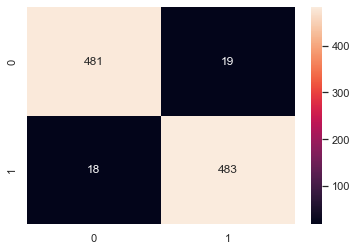

In [45]:
sns.heatmap(cm,annot=True,fmt=".0f")
print(cm)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn = KNeighborsClassifier()

In [48]:
knn.fit(X_train_standard,Y_train)

KNeighborsClassifier()

In [50]:
#accuracy on the test data
X_test_prediction = knn.predict(X_test_standard)
test_data_acc = accuracy_score(X_test_prediction,Y_test)

In [51]:
print("The Accuracy Score on the test data under KNN model is ",test_data_acc)

The Accuracy Score on the test data under KNN model is  0.968031968031968
